<a href="https://colab.research.google.com/github/Koyelisha/Machine-Learning/blob/main/SDM_merged_df_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
pip install esda

In [117]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
from shapely.geometry import Point
from esda.moran import Moran
from libpysal.weights import KNN, lat2W

In [118]:
# Load environmental data
mainga_df = pd.read_csv('/content/merged_dataset.csv')

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(mainga_df, geometry=gpd.points_from_xy(mainga_df.long, mainga_df.lat))

In [119]:
# Set coordinate reference system (CRS) to WGS84
gdf.crs = {'init': 'epsg:4326'}

# Create a KNN weights matrix for spatial autocorrelation
coords = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))
kdtree = KDTree(coords, leaf_size=30)
distances, indices = kdtree.query(coords, k=5)

# Create spatial weights using nearest neighbors
w = KNN.from_dataframe(gdf, k=5)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Photosynthesis - Moran's I: 0.9063558435571776, p-value: 0.001


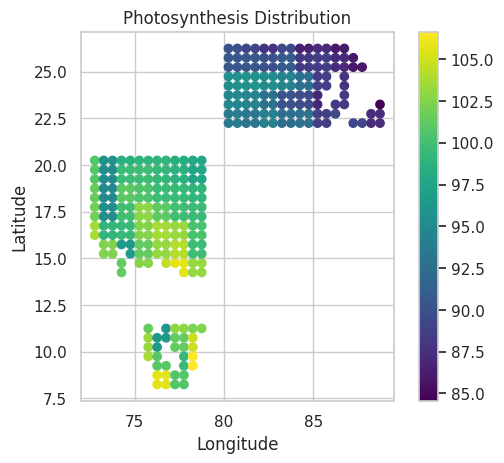

Precipitation - Moran's I: 0.8855548276911585, p-value: 0.001


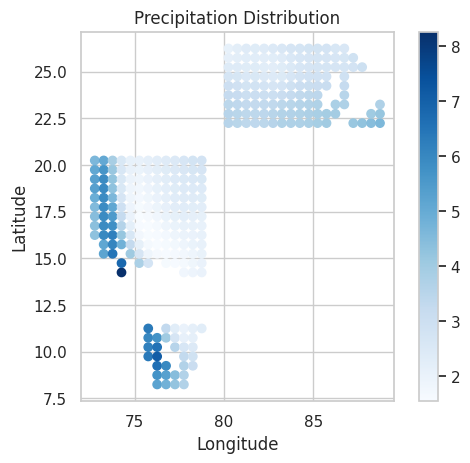

Temperature - Moran's I: 0.8430449278602, p-value: 0.001


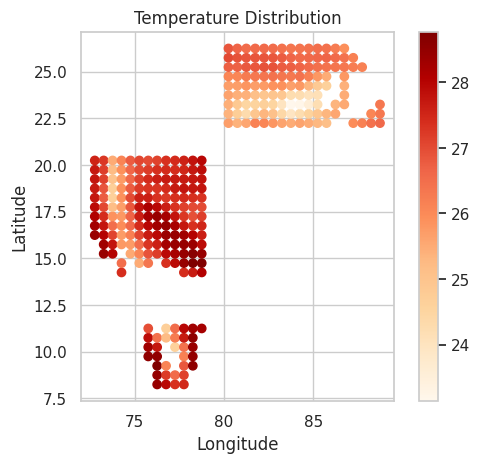

gtop - Moran's I: 0.7780545082708441, p-value: 0.001


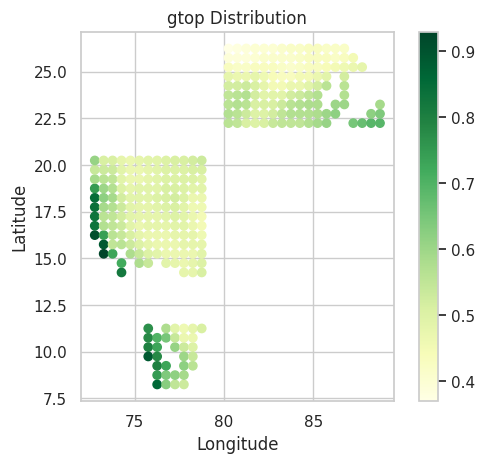

In [120]:
# Calculate Moran's I for photosynthesis
moran_photosynthesis = Moran(gdf['phsyn'].values, w)
print(f"Photosynthesis - Moran's I: {moran_photosynthesis.I}, p-value: {moran_photosynthesis.p_sim}")

# Visualize the photosynthesis distribution
gdf.plot(column='phsyn', cmap='viridis', legend=True)
plt.title('Photosynthesis Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Calculate Moran's I for precipitation
moran_precipitation = Moran(gdf['pre'].values, w)
print(f"Precipitation - Moran's I: {moran_precipitation.I}, p-value: {moran_precipitation.p_sim}")

# Visualize the precipitation distribution
gdf.plot(column='pre', cmap='Blues', legend=True)
plt.title('Precipitation Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Calculate Moran's I for temperature (assuming 'ts' is the temperature column)
moran_temperature = Moran(gdf['ts'].values, w)
print(f"Temperature - Moran's I: {moran_temperature.I}, p-value: {moran_temperature.p_sim}")

# Visualize the temperature distribution
gdf.plot(column='ts', cmap='OrRd', legend=True)
plt.title('Temperature Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Calculate Moran's I for gtop (assuming 'gtop' is the relevant column)
moran_gtop = Moran(gdf['gtop'].values, w)
print(f"gtop - Moran's I: {moran_gtop.I}, p-value: {moran_gtop.p_sim}")

# Visualize the gtop distribution
gdf.plot(column='gtop', cmap='YlGn', legend=True)
plt.title('gtop Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [121]:
df

lat   long     ps     ts  gtop   pre   phsyn  classes
0    14.25  74.25  99.70  27.40  0.82  8.26  101.32        1
1    14.25  77.75  95.21  27.42  0.48  1.79  105.71        0
2    14.25  78.25  95.89  27.65  0.48  1.89  103.11        0
3    14.25  78.75  97.00  28.05  0.51  2.01  103.11        0
4    14.75  74.25  98.77  26.49  0.72  6.81  101.32        1
..     ...    ...    ...    ...   ...   ...     ...      ...
308  26.25  84.75  99.98  26.45  0.43  2.75   86.53        0
309  26.25  85.25  99.99  26.49  0.43  2.76   87.37        0
310  26.25  85.75  99.92  26.44  0.42  2.73   87.37        0
311  26.25  86.25  99.69  26.25  0.42  2.60   86.07        0
312  26.25  86.75  99.34  25.93  0.42  2.59   86.07        0

[313 rows x 8 columns]

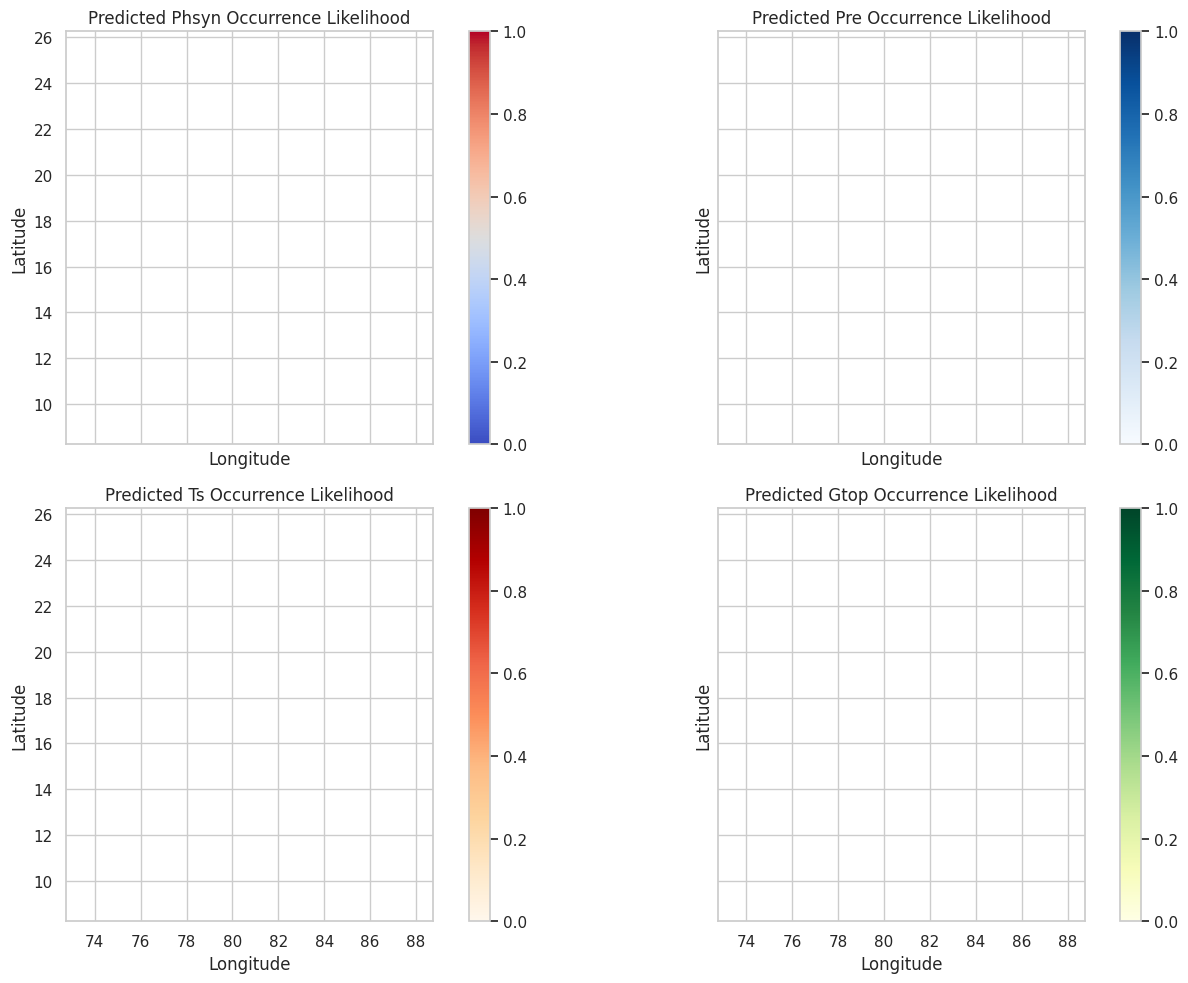

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.neighbors import KDTree
import seaborn as sns

# Sample KDTree initialization and GeoDataFrame setup
# Initialize KDTree with your actual data (replace with actual data and KDTree)
# Example:
# Extract relevant columns for KDTree (assuming 'long' and 'lat' are the relevant columns)
data = df[['long', 'lat']].values  # Use only the longitude and latitude columns
kdtree = KDTree(data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))  # Replace with your actual GeoDataFrame

# Define the grid
lat_min, lat_max = gdf.geometry.y.min(), gdf.geometry.y.max()
lon_min, lon_max = gdf.geometry.x.min(), gdf.geometry.x.max()

lat_grid = np.linspace(lat_min, lat_max, 100)
lon_grid = np.linspace(lon_min, lon_max, 100)
grid_points = np.array(np.meshgrid(lat_grid, lon_grid)).T.reshape(-1, 2)

# Function to predict occurrence likelihood
def predict_likelihood(grid_points, kdtree):
    likelihoods = []
    for point in grid_points:
        distances, _ = kdtree.query([point], k=5)  # Query with 2D points
        likelihoods.append(np.mean(distances))
    likelihoods = np.array(likelihoods)
    return (likelihoods - likelihoods.min()) / (likelihoods.max() - likelihoods.min())

# Predict and prepare data for plotting
parameters = ['phsyn', 'pre', 'ts', 'gtop']
cmap_list = ['coolwarm', 'Blues', 'OrRd', 'YlGn']
predictions = {}

for param in parameters:
    # Replace with actual KDTree query for each parameter
    pred_values = predict_likelihood(grid_points, kdtree)  # Use the corrected predict_likelihood function
    predictions[param] = pred_values

# Create GeoDataFrame for plotting
pred_gdf = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in grid_points])
for param, values in predictions.items():
    pred_gdf[f'pred_{param}'] = values

# Plotting with FacetGrid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for idx, (param, cmap) in enumerate(zip(parameters, cmap_list)):
    ax = axes[idx]
    pred_gdf.plot(column=f'pred_{param}', cmap=cmap, ax=ax, legend=True, alpha=0.6, edgecolor='k')
    ax.set_title(f'Predicted {param.capitalize()} Occurrence Likelihood')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)
    ax.grid(True)

plt.tight_layout()
plt.show()

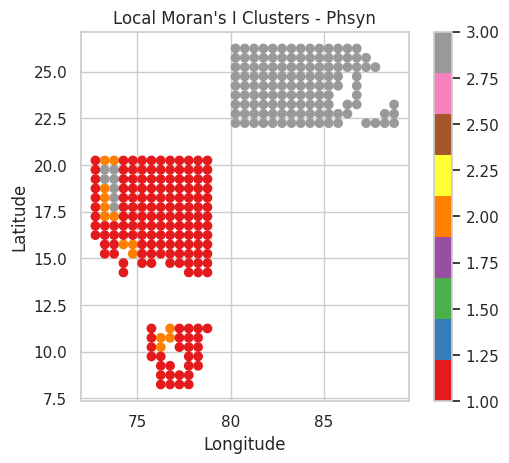

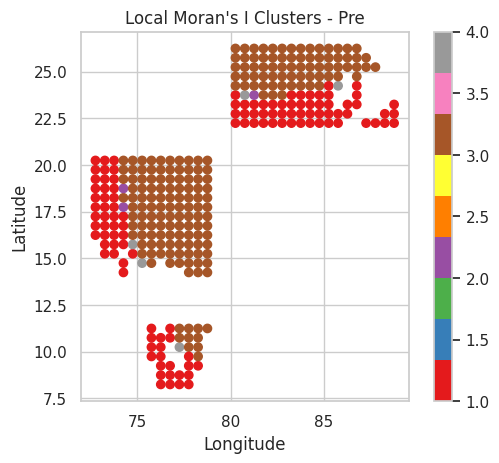

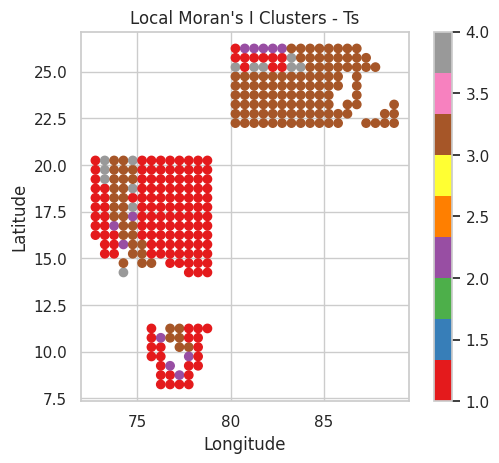

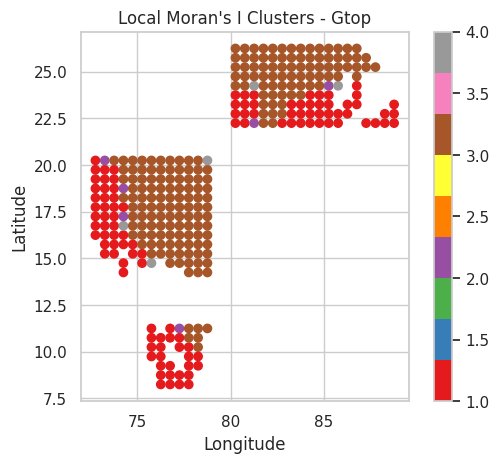

In [123]:
import matplotlib.pyplot as plt
from esda.moran import Moran_Local

# Define a function to perform Local Moran's I analysis and plot the results
def plot_local_moran(variable, gdf, w):
    moran_local = Moran_Local(gdf[variable].values, w)
    gdf[f'LISA_Clusters_{variable}'] = moran_local.q

    gdf.plot(column=f'LISA_Clusters_{variable}', cmap='Set1', legend=True)
    plt.title(f"Local Moran's I Clusters - {variable.capitalize()}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Perform Local Moran's I and plot for each variable
variables = ['phsyn', 'pre', 'ts', 'gtop']

for var in variables:
    plot_local_moran(var, gdf, w)

In [124]:
pip install pysal

/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 313 disconnected components.
 There are 313 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  w = W(neighbors, weights, ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(
/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 313 disconnected components.
 There are 313 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  w = W(neighbors, weights, ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(
/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 313 disconnected components.
 There are 313 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  w = W(neighbors, weights, ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(
/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 313 disconnected components.
 There are 313 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING:

/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  w = W(neighbors, weights, ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(


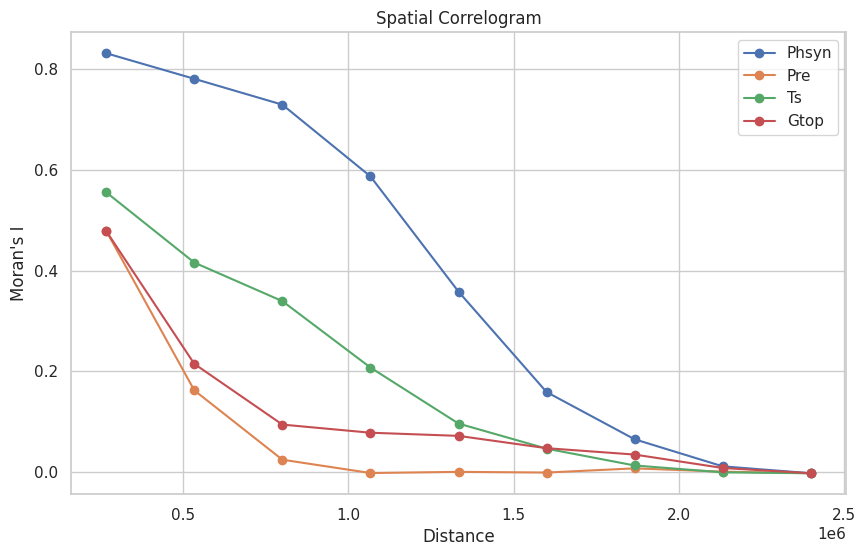

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pysal.lib as ps
from esda.moran import Moran
import geopandas as gpd

# Define a function to create and plot spatial correlogram
def plot_spatial_correlogram(variable, gdf):
    # Compute pairwise distances
    gdf = gdf.copy()
    # Set the original CRS if it's known, for example:
    gdf.crs = 'EPSG:4326'  # Replace with the actual CRS of your data if known
    gdf['geometry'] = gdf.geometry.to_crs(epsg=3395)  # Project to a suitable CRS for distance calculation
    distance_matrix = gdf.geometry.apply(lambda x: gdf.geometry.distance(x))

    max_distance = distance_matrix.max().max()  # Get the maximum distance
    distances = np.linspace(0, max_distance, num=10)

    morans = []
    for d in distances:
        w = ps.weights.DistanceBand.from_dataframe(gdf, threshold=d)
        morans.append(Moran(gdf[variable].values, w).I)

    # Plot spatial correlogram
    plt.plot(distances, morans, marker='o', label=variable.capitalize())

# List of variables to analyze
variables = ['phsyn', 'pre', 'ts', 'gtop']

# Create a plot for each variable
plt.figure(figsize=(10, 6))
for var in variables:
    plot_spatial_correlogram(var, gdf)

# Customize and show the plot
plt.title('Spatial Correlogram')
plt.xlabel('Distance')
plt.ylabel("Moran's I")
plt.legend()
plt.show()

<ipython-input-126-d60166daa3d7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='Moran_I', data=data, palette='viridis')


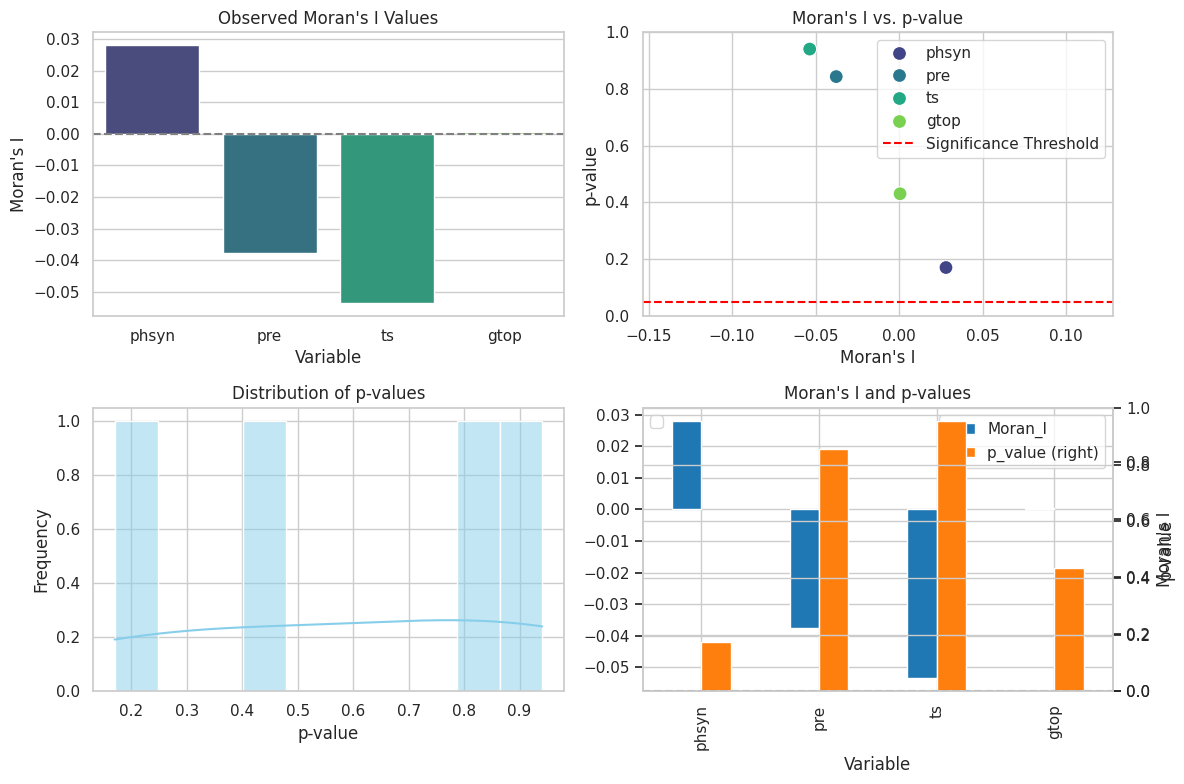

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming results dictionary is already populated from the permutation test
# Example results dictionary (modify according to actual results)
results = {
    'phsyn': {'Moran_I': 0.028082185123145077, 'p_value': 0.17017017017017017},
    'pre': {'Moran_I': -0.03763436430955632, 'p_value': 0.8438438438438438},
    'ts': {'Moran_I': -0.05351143235453864, 'p_value': 0.9409409409409409},
    'gtop': {'Moran_I': 0.0005699321616348301, 'p_value': 0.43043043043043044}
}

# Convert results to DataFrame for easier plotting with seaborn
data = pd.DataFrame(results).T
data.reset_index(inplace=True)
data.columns = ['Variable', 'Moran_I', 'p_value']

# Set up the plotting environment
plt.figure(figsize=(12, 8))

# Create a bar plot for Moran's I values
plt.subplot(2, 2, 1)
sns.barplot(x='Variable', y='Moran_I', data=data, palette='viridis')
plt.title("Observed Moran's I Values")
plt.xlabel("Variable")
plt.ylabel("Moran's I")
plt.axhline(0, color='gray', linestyle='--')

# Create a scatter plot for Moran's I values vs. p-values
plt.subplot(2, 2, 2)
sns.scatterplot(x='Moran_I', y='p_value', hue='Variable', data=data, palette='viridis', s=100, marker='o')
plt.title("Moran's I vs. p-value")
plt.xlabel("Moran's I")
plt.ylabel("p-value")
plt.xlim(data['Moran_I'].min() - 0.1, data['Moran_I'].max() + 0.1)
plt.ylim(0, 1)
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold')
plt.legend()

# Create a histogram of p-values
plt.subplot(2, 2, 3)
sns.histplot(data['p_value'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")

# Create a combined bar plot for Moran's I values and p-values
plt.subplot(2, 2, 4)
ax1 = data.set_index('Variable')[['Moran_I', 'p_value']].plot(kind='bar', secondary_y='p_value', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])
plt.title("Moran's I and p-values")
plt.xlabel("Variable")
plt.ylabel("Moran's I")

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.set_ylabel("p-value")  # Set the label for the secondary y-axis

plt.axhline(0, color='gray', linestyle='--')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<ipython-input-127-23122b42af28>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Variable', y='p-value', data=data, palette='viridis')
<ipython-input-127-23122b42af28>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


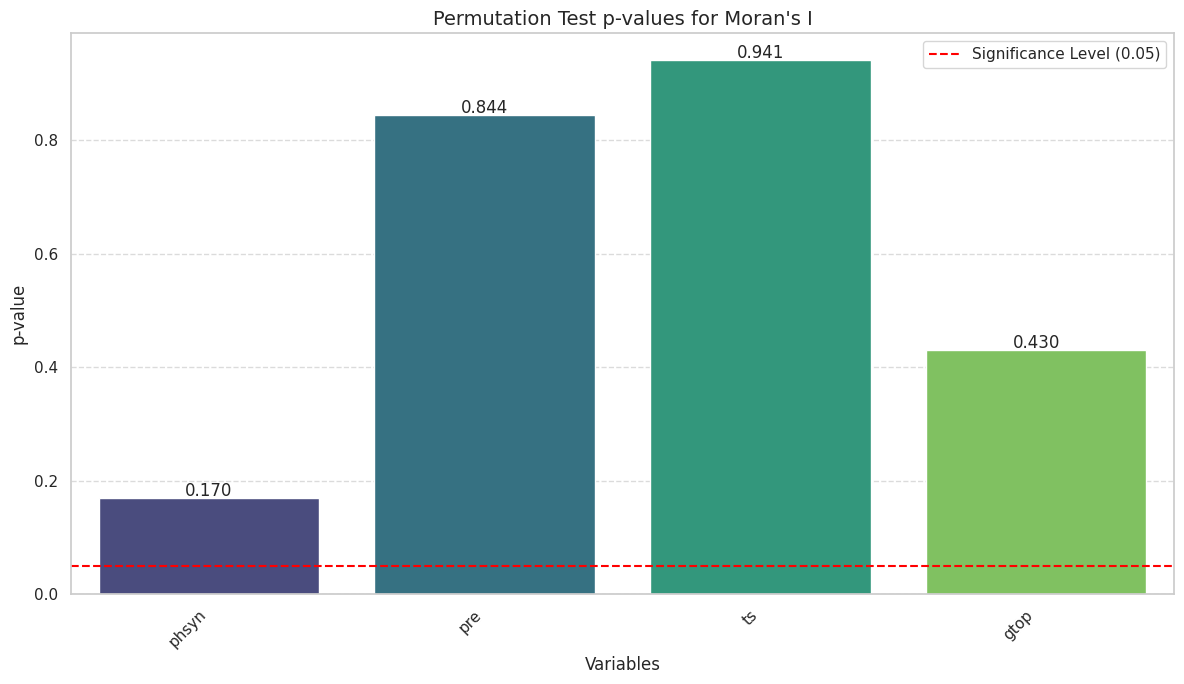

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results dictionary is already populated
variables = list(results.keys())
p_values = [results[var]['p_value'] for var in variables]

# Create a DataFrame for easier plotting with seaborn
import pandas as pd
data = pd.DataFrame({
    'Variable': variables,
    'p-value': p_values
})

# Set up the plotting environment with seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Create the bar plot
ax = sns.barplot(x='Variable', y='p-value', data=data, palette='viridis')

# Add a horizontal line for significance level (e.g., alpha = 0.05)
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel('Variables', fontsize=12)
plt.ylabel('p-value', fontsize=12)
plt.title('Permutation Test p-values for Moran\'s I', fontsize=14)
plt.legend()

# Improve x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [128]:
!pip install scikit-fuzzy

Row 0: Mangrove occurrence likelihood: 0.17
Row 1: Mangrove occurrence likelihood: 0.17
Row 2: Mangrove occurrence likelihood: 0.17
Row 3: Mangrove occurrence likelihood: 0.17
Row 4: Mangrove occurrence likelihood: 0.21
Row 5: Mangrove occurrence likelihood: 0.21
Row 6: Mangrove occurrence likelihood: 0.20
Row 7: Mangrove occurrence likelihood: 0.20
Row 8: Mangrove occurrence likelihood: 0.21
Row 9: Mangrove occurrence likelihood: 0.21
Row 10: Mangrove occurrence likelihood: 0.21
Row 11: Mangrove occurrence likelihood: 0.21
Row 12: Mangrove occurrence likelihood: 0.23
Row 13: Mangrove occurrence likelihood: 0.23
Row 14: Mangrove occurrence likelihood: 0.22
Row 15: Mangrove occurrence likelihood: 0.21
Row 16: Mangrove occurrence likelihood: 0.20
Row 17: Mangrove occurrence likelihood: 0.20
Row 18: Mangrove occurrence likelihood: 0.20
Row 19: Mangrove occurrence likelihood: 0.21
Row 20: Mangrove occurrence likelihood: 0.21
Row 21: Mangrove occurrence likelihood: 0.22
Row 22: Mangrove occ

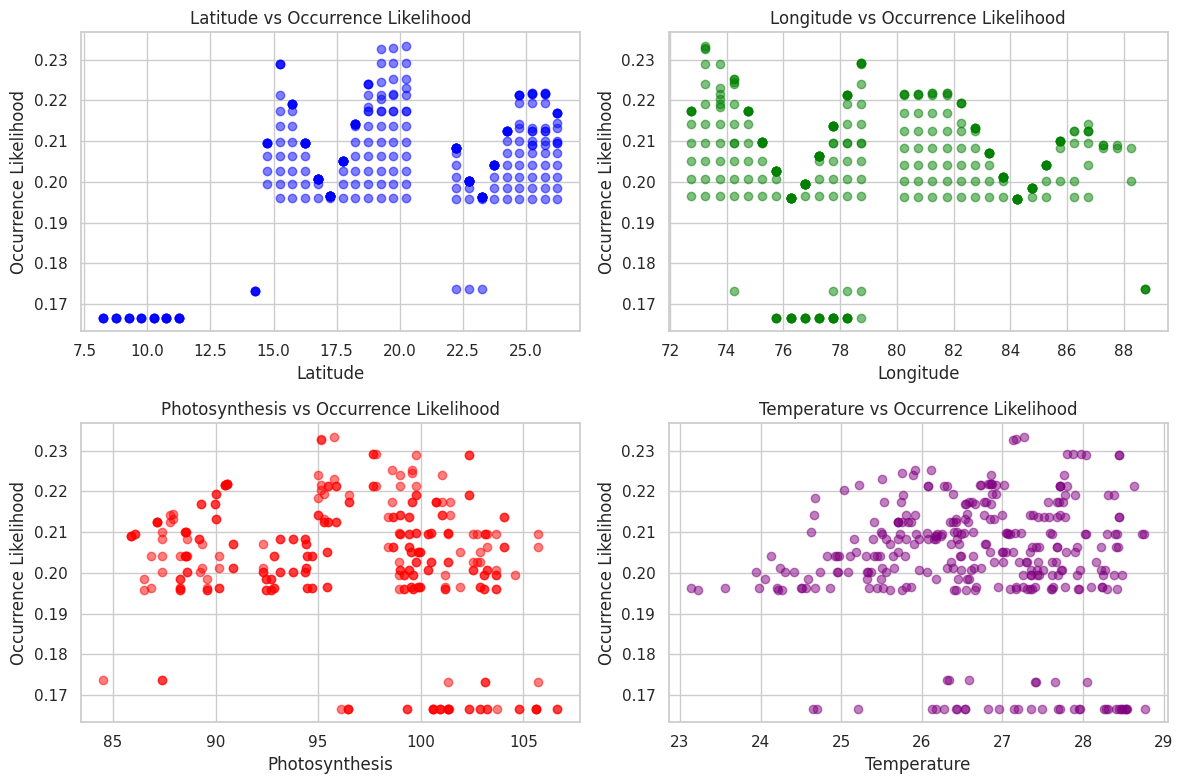

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
latitude = ctrl.Antecedent(np.arange(0, 30, 1), 'latitude')
longitude = ctrl.Antecedent(np.arange(60, 100, 1), 'longitude')
photosynthesis = ctrl.Antecedent(np.arange(0, 100, 1), 'photosynthesis')
temperature = ctrl.Antecedent(np.arange(0, 50, 1), 'temperature')
soil_moisture = ctrl.Antecedent(np.arange(0, 100, 1), 'soil_moisture')
precipitation = ctrl.Antecedent(np.arange(0, 200, 1), 'precipitation')
occurrence = ctrl.Consequent(np.arange(0, 1, 0.01), 'occurrence')

# Define membership functions
latitude['low'] = fuzz.trimf(latitude.universe, [14.25, 14.25, 20])
latitude['medium'] = fuzz.trimf(latitude.universe, [14.25, 20, 26.25])
latitude['high'] = fuzz.trimf(latitude.universe, [20, 26.25, 26.25])

longitude['west'] = fuzz.trimf(longitude.universe, [72.75, 72.75, 80])
longitude['center'] = fuzz.trimf(longitude.universe, [72.75, 80, 88.75])
longitude['east'] = fuzz.trimf(longitude.universe, [80, 88.75, 88.75])

photosynthesis['low'] = fuzz.trimf(photosynthesis.universe, [0, 0, 30])
photosynthesis['medium'] = fuzz.trimf(photosynthesis.universe, [20, 50, 80])
photosynthesis['high'] = fuzz.trimf(photosynthesis.universe, [60, 100, 100])

temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['medium'] = fuzz.trimf(temperature.universe, [10, 30, 40])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 50, 50])

soil_moisture['low'] = fuzz.trimf(soil_moisture.universe, [0, 0, 30])
soil_moisture['medium'] = fuzz.trimf(soil_moisture.universe, [20, 50, 80])
soil_moisture['high'] = fuzz.trimf(soil_moisture.universe, [60, 100, 100])

precipitation['low'] = fuzz.trimf(precipitation.universe, [0, 0, 50])
precipitation['medium'] = fuzz.trimf(precipitation.universe, [30, 75, 120])
precipitation['high'] = fuzz.trimf(precipitation.universe, [100, 200, 200])

occurrence['low'] = fuzz.trimf(occurrence.universe, [0, 0, 0.5])
occurrence['high'] = fuzz.trimf(occurrence.universe, [0.5, 1, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(latitude['low'] & longitude['west'] & photosynthesis['high'] & temperature['high'] & soil_moisture['high'] & precipitation['high'], occurrence['high'])
rule2 = ctrl.Rule(latitude['medium'] & longitude['center'] & photosynthesis['medium'] & temperature['medium'] & soil_moisture['medium'] & precipitation['medium'], occurrence['low'])
rule3 = ctrl.Rule(latitude['high'] & longitude['east'] & photosynthesis['low'] & temperature['low'] & soil_moisture['low'] & precipitation['low'], occurrence['low'])

# Add a catch-all rule
rule4 = ctrl.Rule(~(latitude['low'] | latitude['medium'] | latitude['high']) |
                  ~(longitude['west'] | longitude['center'] | longitude['east']) |
                  ~(photosynthesis['low'] | photosynthesis['medium'] | photosynthesis['high']) |
                  ~(temperature['low'] | temperature['medium'] | temperature['high']) |
                  ~(soil_moisture['low'] | soil_moisture['medium'] | soil_moisture['high']) |
                  ~(precipitation['low'] | precipitation['medium'] | precipitation['high']), occurrence['low'])

# Create fuzzy control system
mangrove_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
mangrove_sim = ctrl.ControlSystemSimulation(mangrove_ctrl)

# Load the dataset
df = pd.read_csv('/content/merged_dataset.csv')

# Initialize lists to store results
occurrence_values = []
latitudes = []
longitudes = []
photosynthesis_values = []
temperature_values = []
soil_moisture_values = []
precipitation_values = []

# Loop through each row in the dataset
for index, row in df.iterrows():
    latitude_val = row['lat']
    longitude_val = row['long']
    photosynthesis_val = row['phsyn']
    temperature_val = row['ts']
    soil_moisture_val = row['gtop']
    precipitation_val = row['pre']

    # Pass inputs to the system
    mangrove_sim.input['latitude'] = latitude_val
    mangrove_sim.input['longitude'] = longitude_val
    mangrove_sim.input['photosynthesis'] = photosynthesis_val
    mangrove_sim.input['temperature'] = temperature_val
    mangrove_sim.input['soil_moisture'] = soil_moisture_val
    mangrove_sim.input['precipitation'] = precipitation_val

    # Compute the result
    try:
        mangrove_sim.compute()
        occurrence_val = mangrove_sim.output['occurrence']
        occurrence_values.append(occurrence_val)
        latitudes.append(latitude_val)
        longitudes.append(longitude_val)
        photosynthesis_values.append(photosynthesis_val)
        temperature_values.append(temperature_val)
        soil_moisture_values.append(soil_moisture_val)
        precipitation_values.append(precipitation_val)
        print(f'Row {index}: Mangrove occurrence likelihood: {occurrence_val:.2f}')
    except ValueError as e:
        print(f'Row {index}: Error computing occurrence - {str(e)}')

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(latitudes, occurrence_values, c='blue', alpha=0.5)
plt.title('Latitude vs Occurrence Likelihood')
plt.xlabel('Latitude')
plt.ylabel('Occurrence Likelihood')

plt.subplot(2, 2, 2)
plt.scatter(longitudes, occurrence_values, c='green', alpha=0.5)
plt.title('Longitude vs Occurrence Likelihood')
plt.xlabel('Longitude')
plt.ylabel('Occurrence Likelihood')

plt.subplot(2, 2, 3)
plt.scatter(photosynthesis_values, occurrence_values, c='red', alpha=0.5)
plt.title('Photosynthesis vs Occurrence Likelihood')
plt.xlabel('Photosynthesis')
plt.ylabel('Occurrence Likelihood')

plt.subplot(2, 2, 4)
plt.scatter(temperature_values, occurrence_values, c='purple', alpha=0.5)
plt.title('Temperature vs Occurrence Likelihood')
plt.xlabel('Temperature')
plt.ylabel('Occurrence Likelihood')

plt.tight_layout()
plt.show()

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming 'actual_occurrence' is the ground truth from your dataset
y_true = df['classes']  # Replace 'classes' with your actual occurrence column
y_pred = []

# Loop through each row and get the fuzzy output
for index, row in df.iterrows():
    latitude_val = row['lat']
    longitude_val = row['long']
    photosynthesis_val = row['phsyn']
    temperature_val = row['ts']
    soil_moisture_val = row['gtop']
    precipitation_val = row['pre']

    # Pass inputs to the system
    mangrove_sim.input['latitude'] = latitude_val
    mangrove_sim.input['longitude'] = longitude_val
    mangrove_sim.input['photosynthesis'] = photosynthesis_val
    mangrove_sim.input['temperature'] = temperature_val
    mangrove_sim.input['soil_moisture'] = soil_moisture_val
    mangrove_sim.input['precipitation'] = precipitation_val

    try:
        mangrove_sim.compute()
        occurrence_val = mangrove_sim.output['occurrence']
        y_pred.append(1 if occurrence_val > 0.5 else 0)  # Apply threshold of 0.5
    except ValueError as e:
        y_pred.append(0)  # or you could handle this differently

# Compute confusion matrix and metrics
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Confusion Matrix:
 [[262   0]
 [ 51   0]]
Accuracy: 0.84
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC AUC Score: 0.38


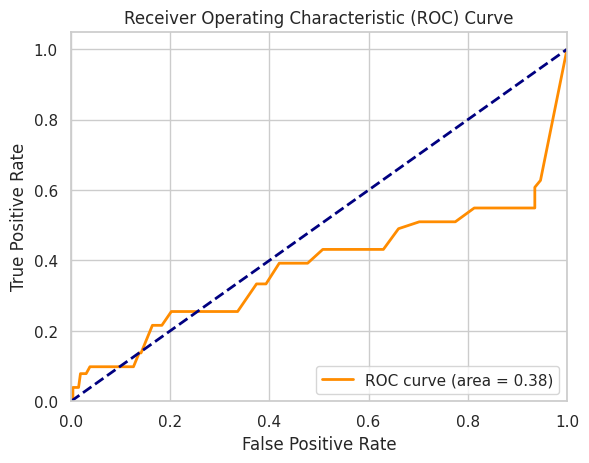

In [131]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = []

# Loop through each row and get the fuzzy output as a probability
for index, row in df.iterrows():
    latitude_val = row['lat']
    longitude_val = row['long']
    photosynthesis_val = row['phsyn']
    temperature_val = row['ts']
    soil_moisture_val = row['gtop']
    precipitation_val = row['pre']

    # Pass inputs to the system
    mangrove_sim.input['latitude'] = latitude_val
    mangrove_sim.input['longitude'] = longitude_val
    mangrove_sim.input['photosynthesis'] = photosynthesis_val
    mangrove_sim.input['temperature'] = temperature_val
    mangrove_sim.input['soil_moisture'] = soil_moisture_val
    mangrove_sim.input['precipitation'] = precipitation_val

    try:
        mangrove_sim.compute()
        occurrence_val = mangrove_sim.output['occurrence']
        y_pred_proba.append(occurrence_val)
    except ValueError as e:
        y_pred_proba.append(0)  # or handle differently

# Compute ROC AUC score
roc_auc = roc_auc_score(y_true, y_pred_proba)
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)

print(f'ROC AUC Score: {roc_auc:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [132]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred_proba)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.14


In [133]:
df

lat   long     ps     ts  gtop   pre   phsyn  classes
0    14.25  74.25  99.70  27.40  0.82  8.26  101.32        1
1    14.25  77.75  95.21  27.42  0.48  1.79  105.71        0
2    14.25  78.25  95.89  27.65  0.48  1.89  103.11        0
3    14.25  78.75  97.00  28.05  0.51  2.01  103.11        0
4    14.75  74.25  98.77  26.49  0.72  6.81  101.32        1
..     ...    ...    ...    ...   ...   ...     ...      ...
308  26.25  84.75  99.98  26.45  0.43  2.75   86.53        0
309  26.25  85.25  99.99  26.49  0.43  2.76   87.37        0
310  26.25  85.75  99.92  26.44  0.42  2.73   87.37        0
311  26.25  86.25  99.69  26.25  0.42  2.60   86.07        0
312  26.25  86.75  99.34  25.93  0.42  2.59   86.07        0

[313 rows x 8 columns]

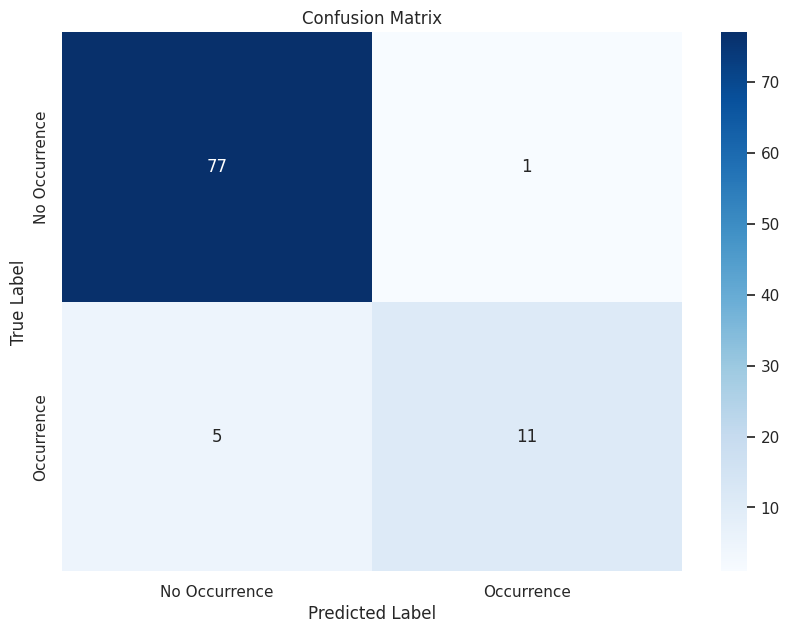

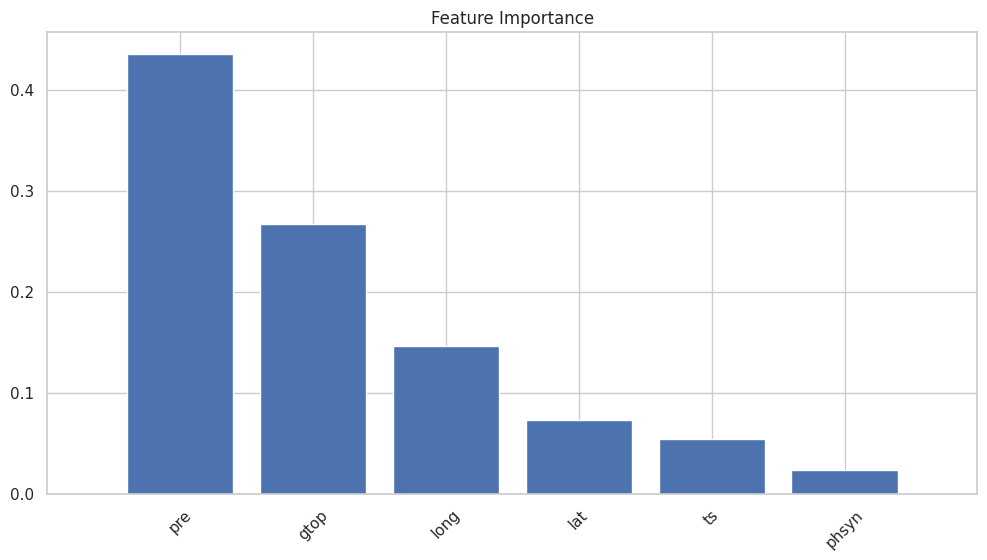

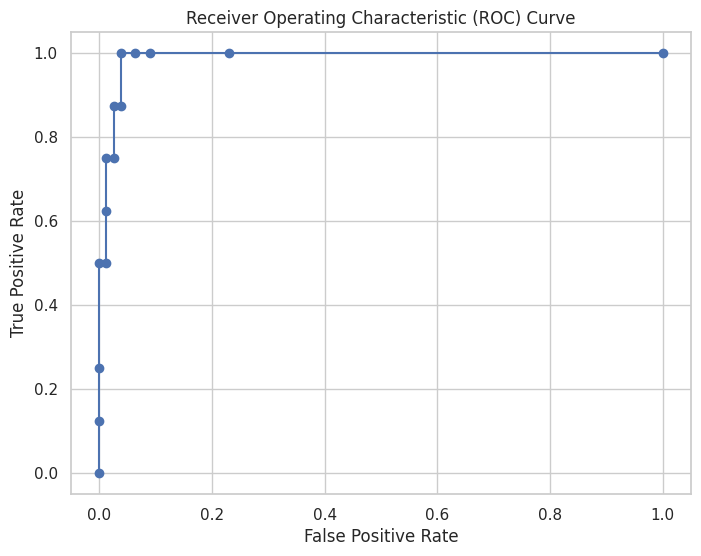

Classification Report:
              precision    recall  f1-score   support
0              0.939024  0.987179  0.962500  78.00000
1              0.916667  0.687500  0.785714  16.00000
accuracy       0.936170  0.936170  0.936170   0.93617
macro avg      0.927846  0.837340  0.874107  94.00000
weighted avg   0.935219  0.936170  0.932409  94.00000


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Example DataFrame setup (replace with actual data)
# data = {
#     'latitude': [15, 20, 25, 7.5, 10],
#     'longitude': [73, 75, 77, 72, 74],
#     'photosynthesis': [70, 50, 30, 80, 60],
#     'temperature': [32, 28, 22, 35, 30],
#     'soil_moisture': [75, 60, 40, 85, 70],
#     'precipitation': [120, 100, 80, 150, 110],
#     'occurrence': [1, 0, 0, 1, 1]  # 1: Occurrence, 0: No Occurrence
# }
# df = pd.DataFrame(data)

# Features and target variable
X = df[['lat', 'long', 'phsyn', 'ts', 'gtop', 'pre']]
y = df['classes']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred, output_dict=True)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Occurrence', 'Occurrence'], yticklabels=['No Occurrence', 'Occurrence'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Classification Report DataFrame
report_df = pd.DataFrame(report).transpose()
print('Classification Report:')
print(report_df)

Gaussian Naive Bayes Accuracy: 0.93
ROC AUC Score: 0.98
Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        78
           1       0.80      0.75      0.77        16

    accuracy                           0.93        94
   macro avg       0.87      0.86      0.86        94
weighted avg       0.92      0.93      0.92        94


AdaBoost Classifier Accuracy: 0.97
ROC AUC Score: 0.99
Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.88      0.94      0.91        16

    accuracy                           0.97        94
   macro avg       0.93      0.96      0.94        94
weighted avg       0.97      0.97      0.97        94



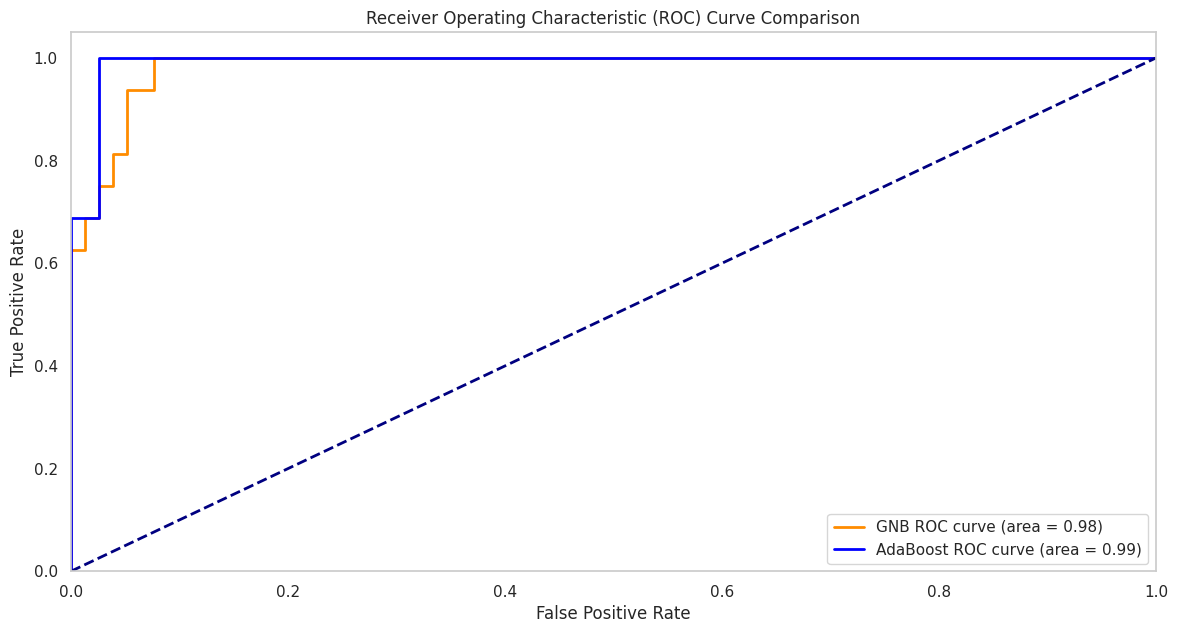

<ipython-input-135-9cc75bf7a1eb>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


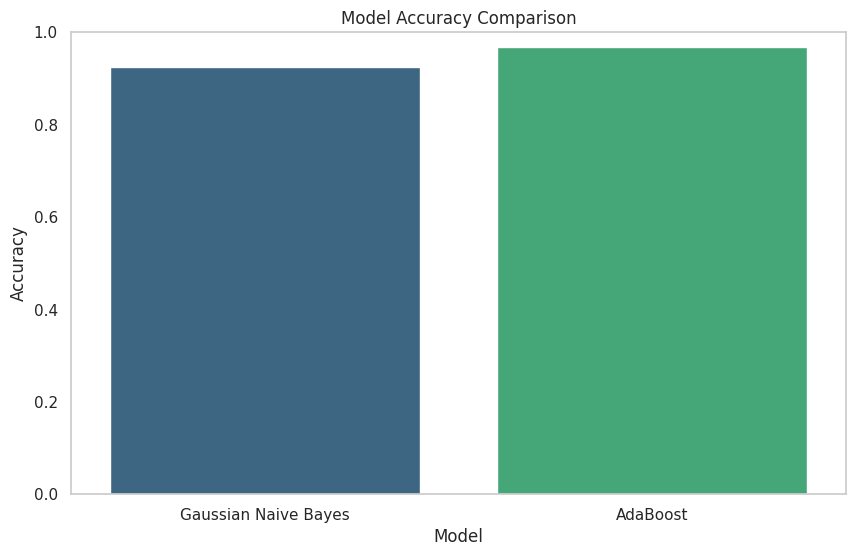

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Example DataFrame setup (replace with actual data)
# data = {
#     'latitude': [15, 20, 25, 7.5, 10],
#     'longitude': [73, 75, 77, 72, 74],
#     'photosynthesis': [70, 50, 30, 80, 60],
#     'temperature': [32, 28, 22, 35, 30],
#     'soil_moisture': [75, 60, 40, 85, 70],
#     'precipitation': [120, 100, 80, 150, 110],
#     'occurrence': [1, 0, 0, 1, 1]  # 1: Occurrence, 0: No Occurrence
# }
# df = pd.DataFrame(data)

# Features and target variable
X = df[['lat', 'long', 'phsyn', 'ts', 'gtop', 'pre']]
y = df['classes']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
gnb_model = GaussianNB()
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train models
gnb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Predict and evaluate Gaussian Naive Bayes
y_pred_gnb = gnb_model.predict(X_test)
y_pred_proba_gnb = gnb_model.predict_proba(X_test)[:, 1]
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
roc_auc_gnb = roc_auc_score(y_test, y_pred_proba_gnb)

# Predict and evaluate AdaBoost
y_pred_ada = ada_model.predict(X_test)
y_pred_proba_ada = ada_model.predict_proba(X_test)[:, 1]
accuracy_ada = accuracy_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)

# Print metrics
print(f'Gaussian Naive Bayes Accuracy: {accuracy_gnb:.2f}')
print(f'ROC AUC Score: {roc_auc_gnb:.2f}')
print('Classification Report for Gaussian Naive Bayes:')
print(classification_report(y_test, y_pred_gnb))

print(f'\nAdaBoost Classifier Accuracy: {accuracy_ada:.2f}')
print(f'ROC AUC Score: {roc_auc_ada:.2f}')
print('Classification Report for AdaBoost Classifier:')
print(classification_report(y_test, y_pred_ada))

# ROC Curve Plot
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_proba_gnb)
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ada)

plt.figure(figsize=(14, 7))
plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label=f'GNB ROC curve (area = {roc_auc_gnb:.2f})')
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label=f'AdaBoost ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Accuracy Comparison Bar Chart
models = ['Gaussian Naive Bayes', 'AdaBoost']
accuracies = [accuracy_gnb, accuracy_ada]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(axis='y')
plt.show()

In [136]:
!pip install --upgrade esda

<ipython-input-137-a59564597941>:13: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


Moran's I for phsyn: 0.851
P-Value: 0.001
Moran's I for pre: 0.834
P-Value: 0.001
Moran's I for gtop: 0.764
P-Value: 0.001
Moran's I for ts: 0.745
P-Value: 0.001


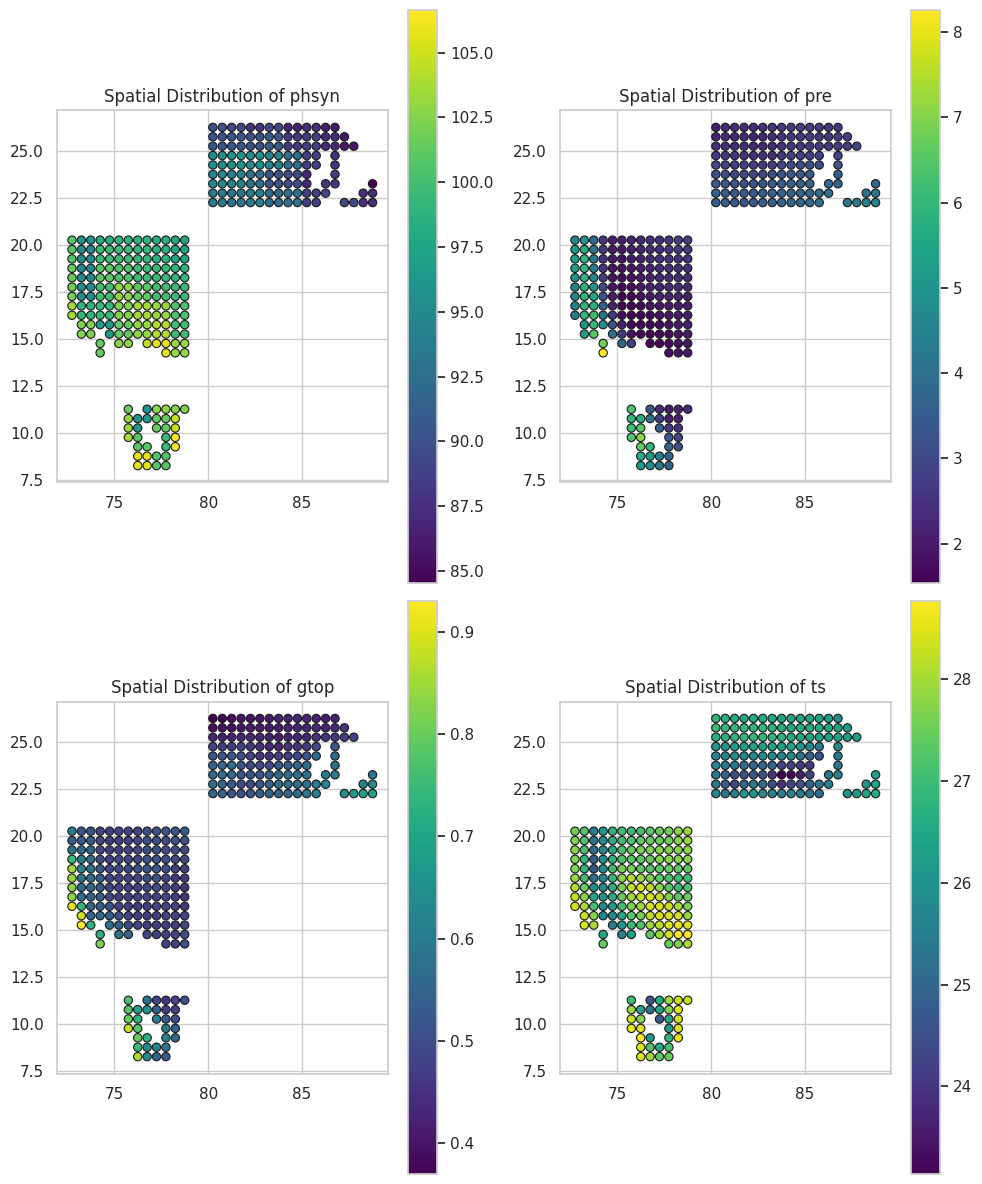

In [137]:
# !pip install --upgrade esda
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import Queen
from esda.moran import Moran
from esda.getisord import G_Local

# ... (Your GeoDataFrame setup)

# Calculate spatial weights (only needs to be done once)
w = Queen.from_dataframe(gdf)

# Create subplots
fig, axes = plt.subplots(2, 2 , figsize=(10, 12))  # 2 rows, 2 columns

# Loop through columns and plot, adjusting indexing for 2x2 grid
for i, column in enumerate(['phsyn','pre', 'gtop', 'ts']):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index

    # Moran's I Calculation (optional, print if needed)
    moran = Moran(gdf[column], w)
    print(f"Moran's I for {column}: {moran.I:.3f}")
    print(f"P-Value: {moran.p_sim:.3f}")

    # Getis-Ord Gi* Calculation (optional, store if needed)
    gi_star = G_Local(gdf[column], w)
    gdf['gi_star_' + column] = gi_star.Gs

    # Plot on the corresponding subplot using calculated row and col indices
    gdf.plot(column=column, cmap='viridis', linewidth=0.8, ax=axes[row, col],
             edgecolor='k', legend=True)
    axes[row, col].set_title(f"Spatial Distribution of {column}")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

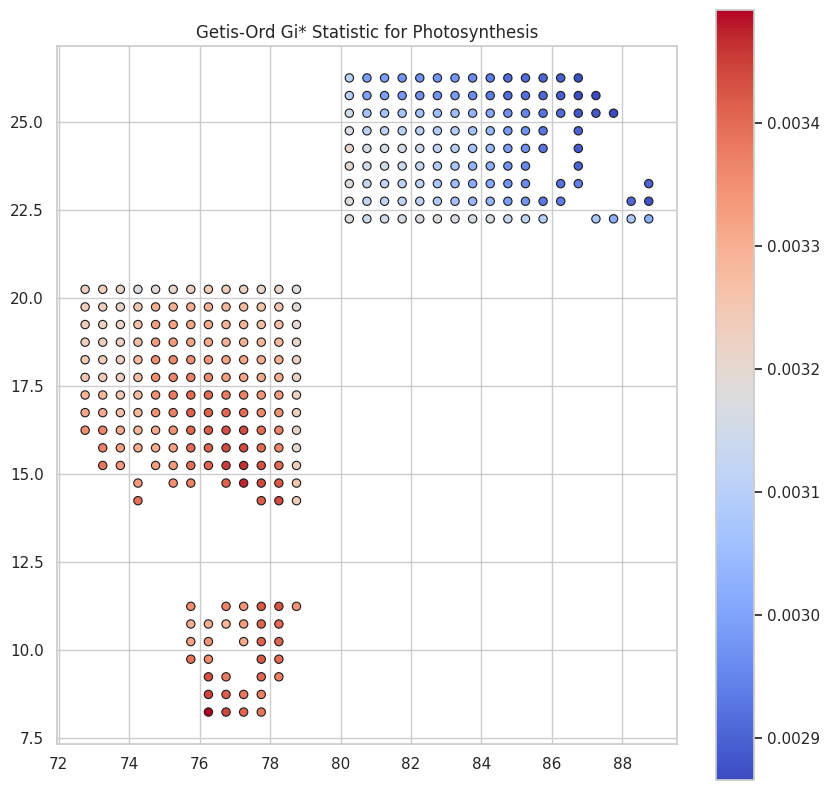

In [138]:
# Plot Getis-Ord Gi* statistic for a specific column (replace 'phsyn' with the desired column)
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='gi_star_phsyn', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='k', legend=True)
ax.set_title("Getis-Ord Gi* Statistic for Photosynthesis")
plt.show()

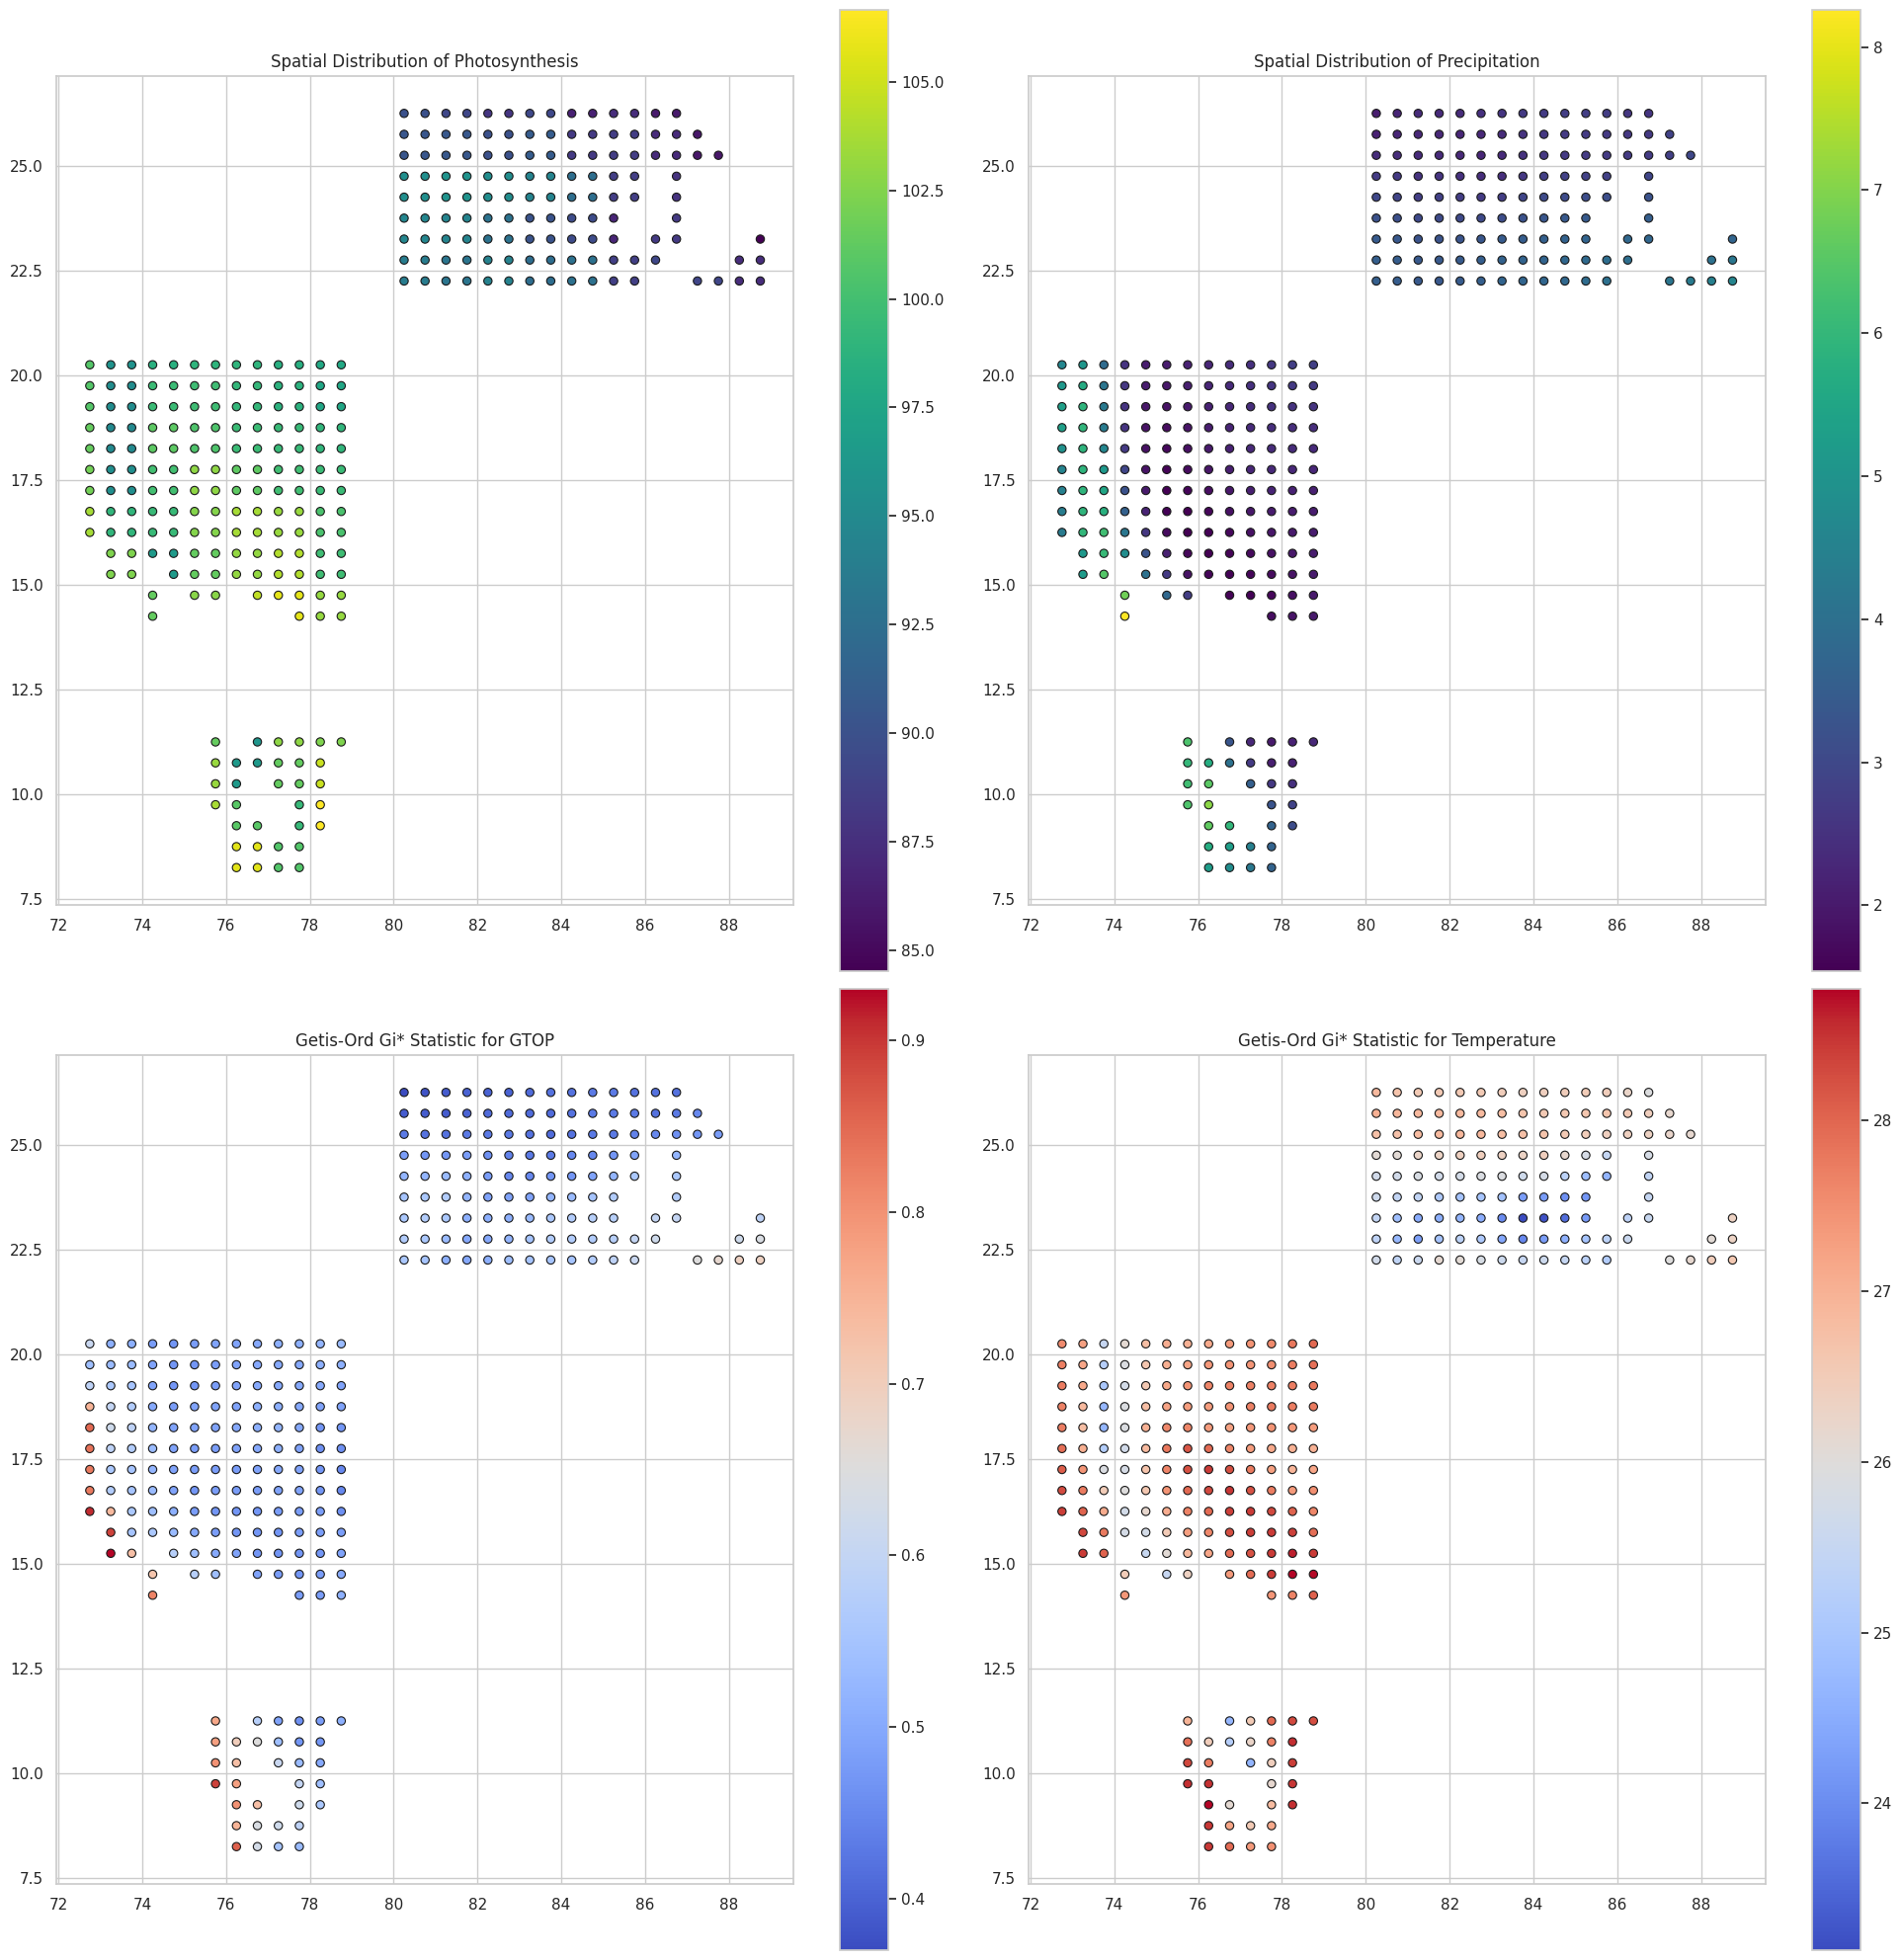

In [139]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Moran's I Maps
gdf.plot(column='phsyn', cmap='viridis', linewidth=0.8, ax=axs[0, 0], edgecolor='k', legend=True)
axs[0, 0].set_title("Spatial Distribution of Photosynthesis")

gdf.plot(column='pre', cmap='viridis', linewidth=0.8, ax=axs[0, 1], edgecolor='k', legend=True)
axs[0, 1].set_title("Spatial Distribution of Precipitation")

# Getis-Ord Gi* Maps
gdf.plot(column='gtop', cmap='coolwarm', linewidth=0.8, ax=axs[1, 0], edgecolor='k', legend=True)
axs[1, 0].set_title("Getis-Ord Gi* Statistic for GTOP")

gdf.plot(column='ts', cmap='coolwarm', linewidth=0.8, ax=axs[1, 1], edgecolor='k', legend=True)
axs[1, 1].set_title("Getis-Ord Gi* Statistic for Temperature")

plt.tight_layout()
plt.show()

In [140]:
pip install GetisOrd_GiStar

ERROR: Could not find a version that satisfies the requirement GetisOrd_GiStar (from versions: none)
ERROR: No matching distribution found for GetisOrd_GiStar


<ipython-input-141-239b1c5b70c9>:19: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


Moran's I for phsyn: 0.851
P-Value: 0.001
Moran's I for pre: 0.834
P-Value: 0.001
Moran's I for gtop: 0.764
P-Value: 0.001
Moran's I for ts: 0.745
P-Value: 0.001


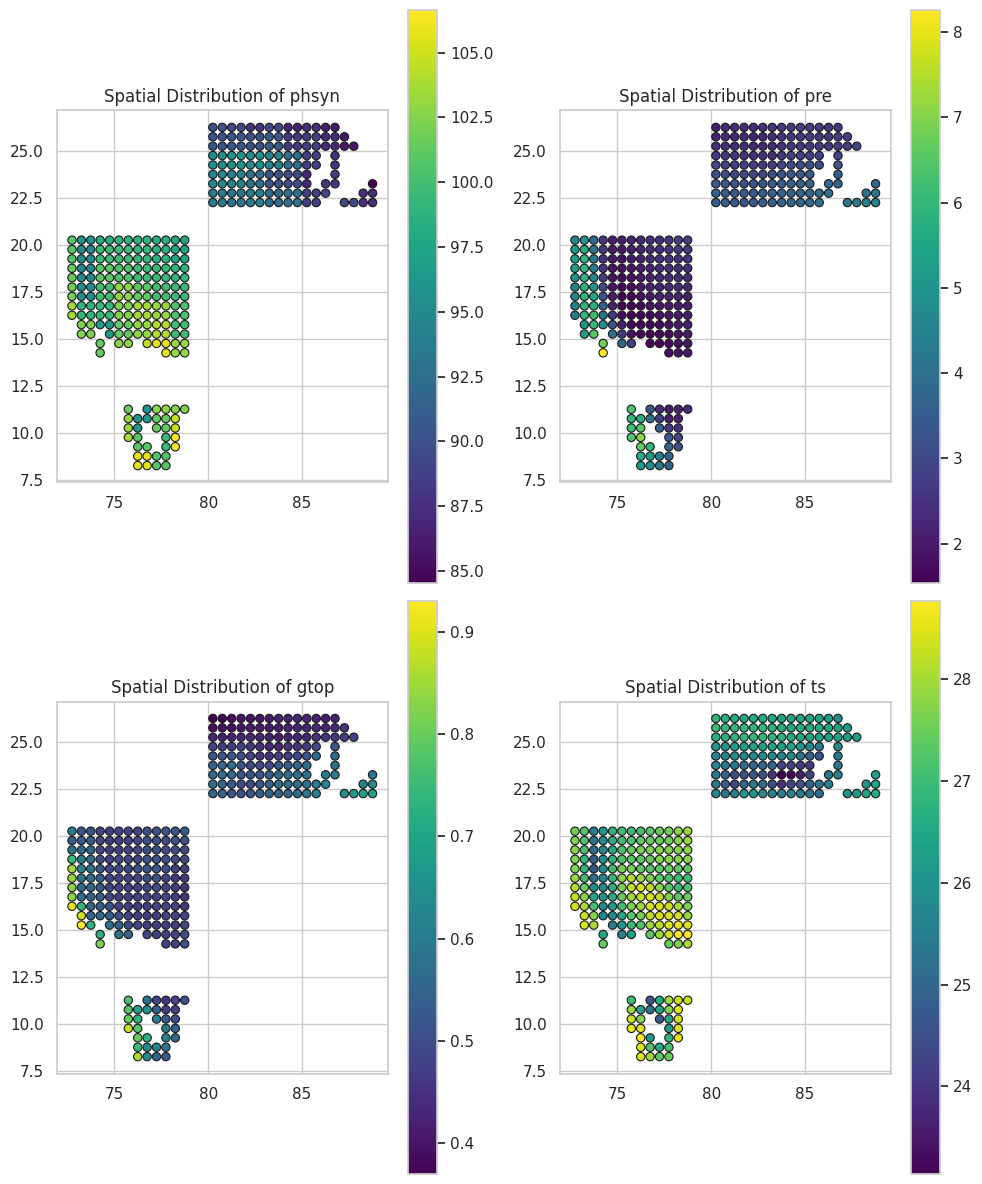

In [141]:
# !pip install --upgrade esda  # Ensure esda is installed and up-to-date
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import Queen
from esda.moran import Moran
from esda.getisord import G_Local  # Use G_Local for Getis-Ord Gi*

# ... (Your GeoDataFrame setup - replace with your actual data)
# Example:
# gdf = gpd.GeoDataFrame({
#     'latitude': [15, 20, 25, 7.5, 10],
#     'longitude': [73, 75, 77, 72, 74],
#     'value': [70, 50, 30, 80, 60]
# }, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Calculate spatial weights (only needs to be done once)
w = Queen.from_dataframe(gdf)

# Calculate and visualize Moran's I and Getis-Ord Gi*

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 12))  # 2 rows, 2 columns

# Loop through columns and plot
for i, column in enumerate(['phsyn', 'pre', 'gtop', 'ts']):  # Replace with your column names
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index

    # Moran's I Calculation (optional, print if needed)
    moran = Moran(gdf[column], w)
    print(f"Moran's I for {column}: {moran.I:.3f}")
    print(f"P-Value: {moran.p_sim:.3f}")

    # Getis-Ord Gi* Calculation
    gi_star = G_Local(gdf[column], w)
    gdf['gi_star_' + column] = gi_star.Gs

    # Plot on the corresponding subplot
    gdf.plot(column=column, cmap='viridis', linewidth=0.8, ax=axes[row, col],
             edgecolor='k', legend=True)
    axes[row, col].set_title(f"Spatial Distribution of {column}")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


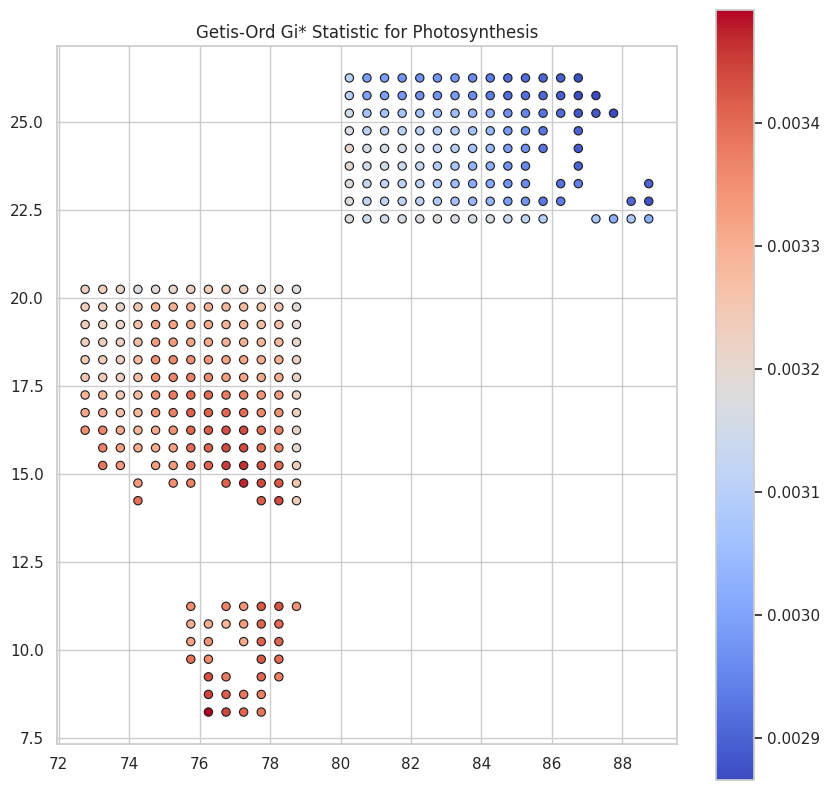

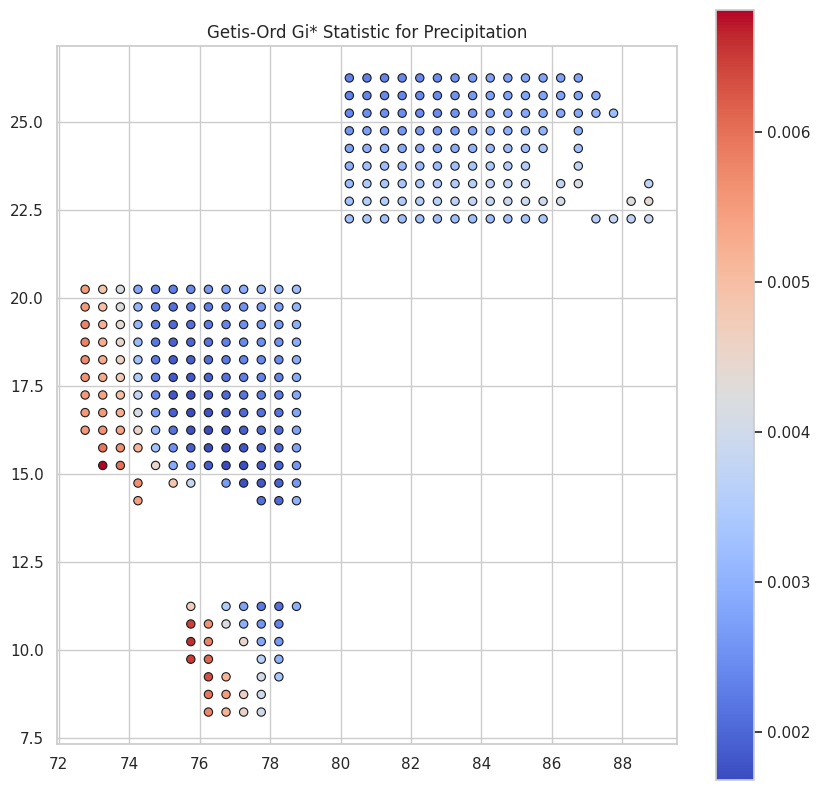

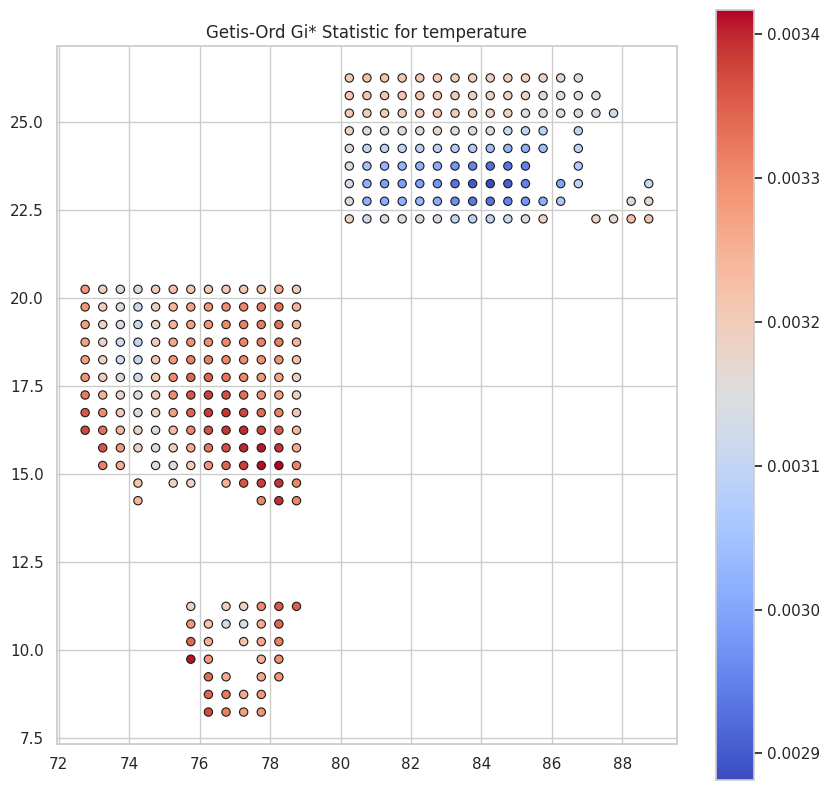

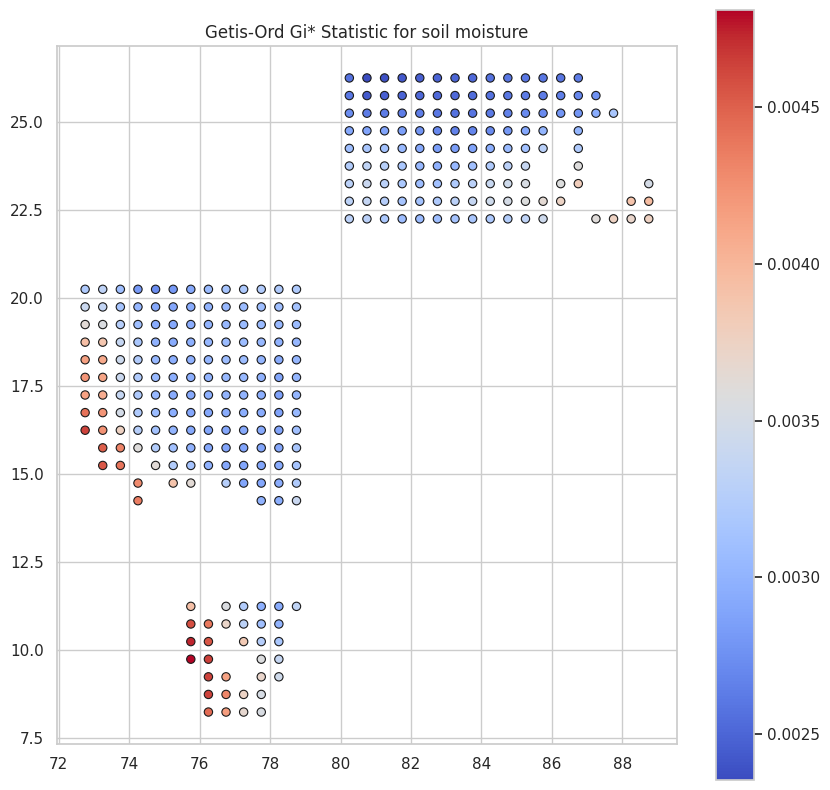

In [142]:
# Plot Getis-Ord Gi* statistic for  photosynthesis
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='gi_star_phsyn', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='k', legend=True)  # Replace 'phsyn' with desired column
ax.set_title("Getis-Ord Gi* Statistic for Photosynthesis")  # Adjust title accordingly
plt.show()

# Plot Getis-Ord Gi* statistic for  precipitation
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='gi_star_pre', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='k', legend=True)  # Replace 'phsyn' with desired column
ax.set_title("Getis-Ord Gi* Statistic for Precipitation")  # Adjust title accordingly
plt.show()

# Plot Getis-Ord Gi* statistic for temperature
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='gi_star_ts', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='k', legend=True)  # Replace 'phsyn' with desired column
ax.set_title("Getis-Ord Gi* Statistic for temperature")  # Adjust title accordingly
plt.show()

# Plot Getis-Ord Gi* statistic for soil moisture
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='gi_star_gtop', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='k', legend=True)  # Replace 'phsyn' with desired column
ax.set_title("Getis-Ord Gi* Statistic for soil moisture")  # Adjust title accordingly
plt.show()

<ipython-input-143-9d5fee5347a5>:22: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


Moran's I for phsyn: 0.851
P-Value: 0.001
Moran's I for pre: 0.834
P-Value: 0.001
Moran's I for gtop: 0.764
P-Value: 0.001
Moran's I for ts: 0.745
P-Value: 0.001


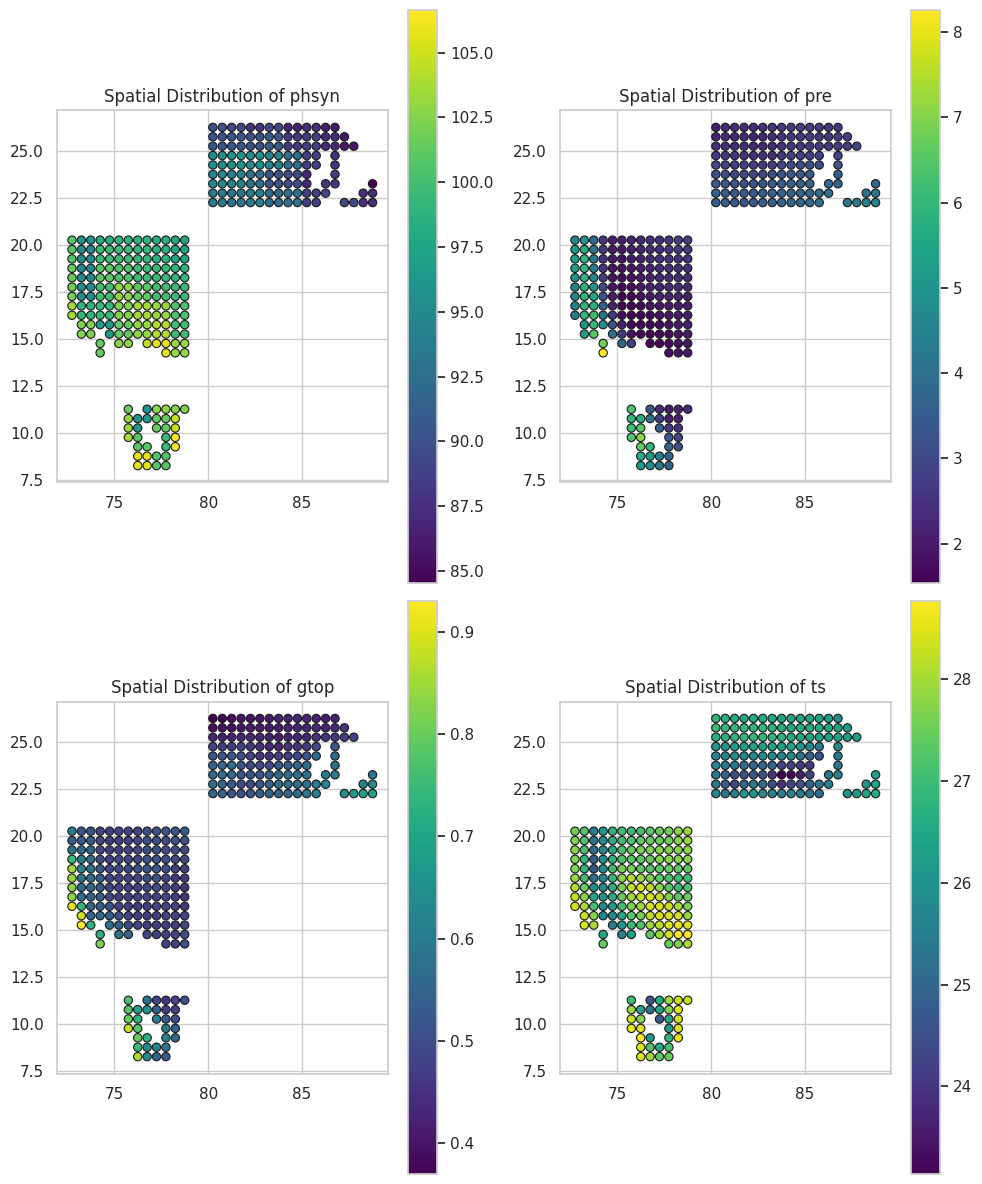

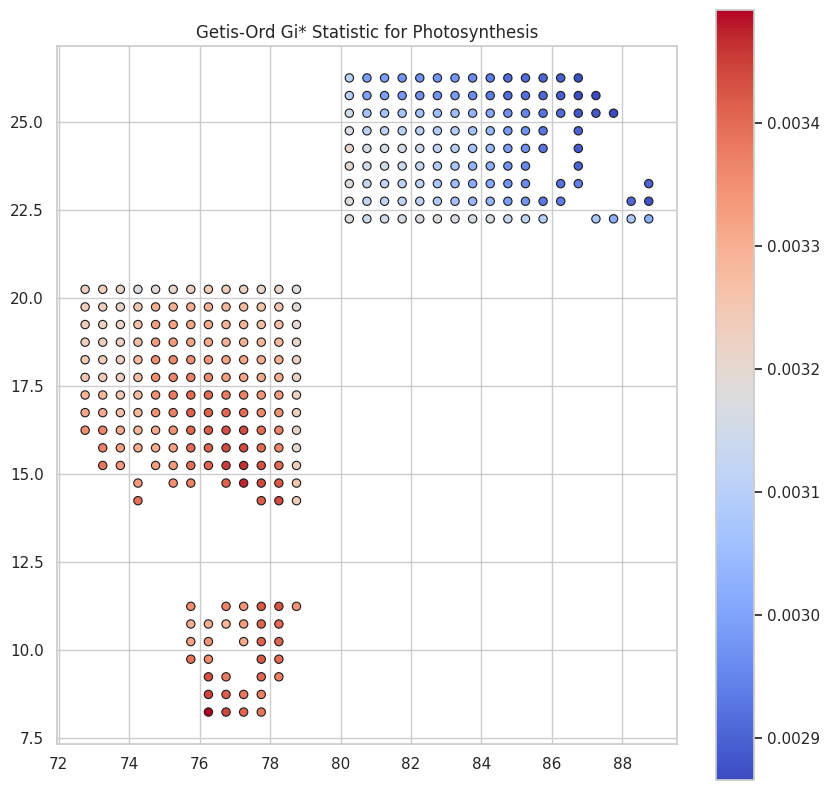

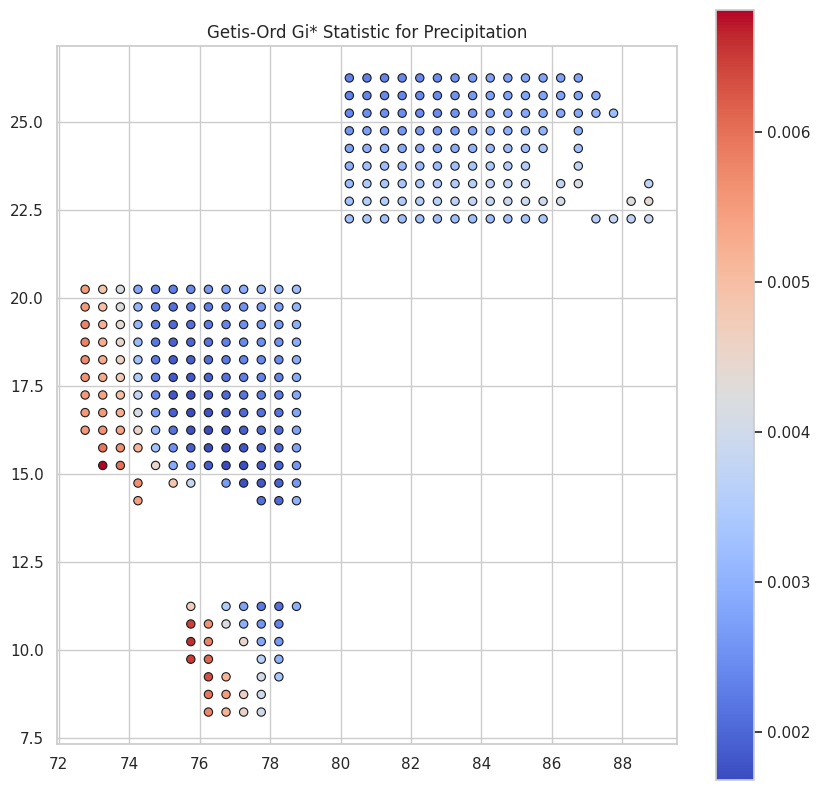

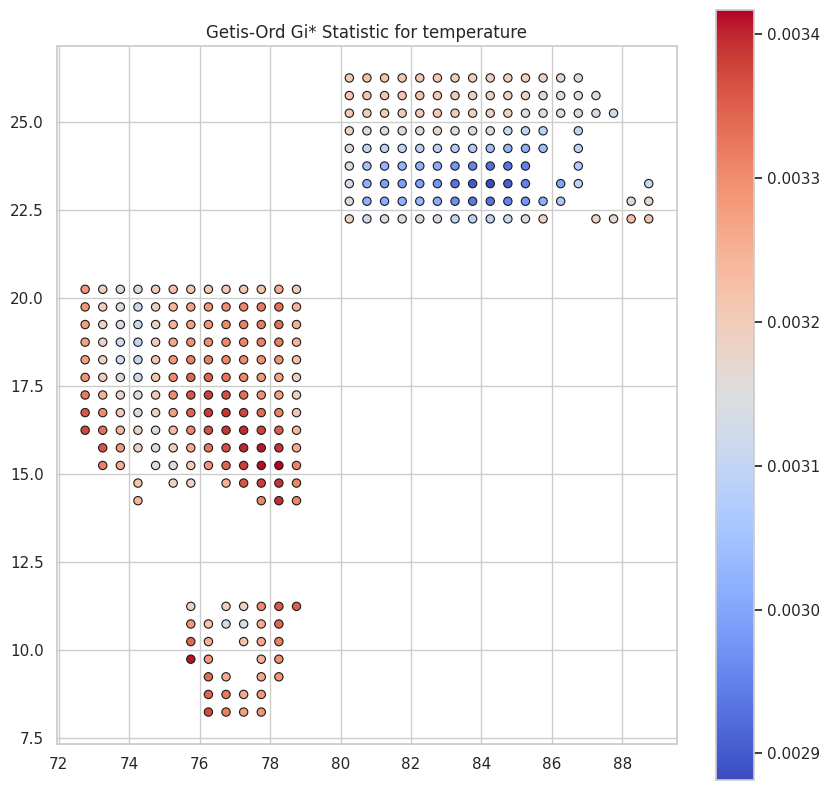

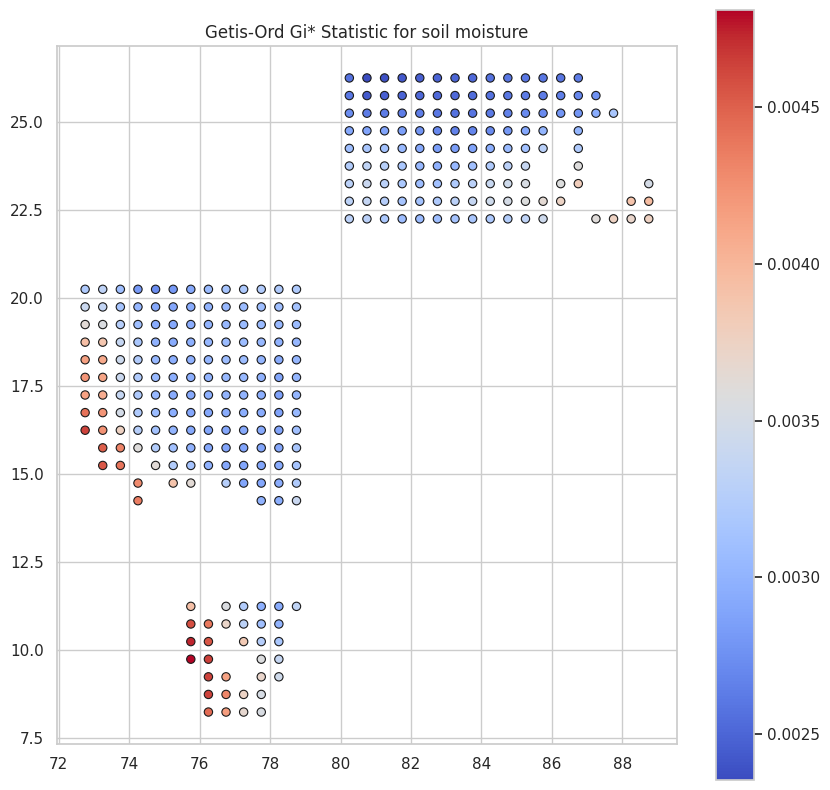

In [143]:
# !pip install --upgrade esda  # Ensure esda is installed and up-to-date
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import Queen
from esda.moran import Moran
from esda.getisord import G_Local  # Use G_Local for Getis-Ord Gi*

# Example GeoDataFrame setup (replace with your actual data)
# Assuming 'df' is your DataFrame with 'latitude', 'longitude', and relevant value columns
# Make sure 'df' has the correct number of rows and valid coordinates
# Example:


# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.long, df.lat)
)

# Calculate spatial weights (only needs to be done once)
w = Queen.from_dataframe(gdf)

# Calculate and visualize Moran's I and Getis-Ord Gi*

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 12))  # 2 rows, 2 columns

# Loop through columns and plot
for i, column in enumerate(['phsyn', 'pre', 'gtop', 'ts']):  # Replace with your column names
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index

    # Moran's I Calculation (optional, print if needed)
    moran = Moran(gdf[column], w)
    print(f"Moran's I for {column}: {moran.I:.3f}")
    print(f"P-Value: {moran.p_sim:.3f}")

    # Getis-Ord Gi* Calculation
    gi_star = G_Local(gdf[column], w)
    gdf['gi_star_' + column] = gi_star.Gs

    # Plot on the corresponding subplot
    gdf.plot(column=column, cmap='viridis', linewidth=0.8, ax=axes[row, col],
             edgecolor='k', legend=True)
    axes[row, col].set_title(f"Spatial Distribution of {column}")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Plot individual Getis-Ord Gi* maps if needed (adjust titles accordingly)
# Example:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='gi_star_phsyn', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='k', legend=True)
ax.set_title("Getis-Ord Gi* Statistic for Photosynthesis")
plt.show()
# Plot Getis-Ord Gi* statistic for  precipitation
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='gi_star_pre', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='k', legend=True)  # Replace 'phsyn' with desired column
ax.set_title("Getis-Ord Gi* Statistic for Precipitation")  # Adjust title accordingly
plt.show()

# Plot Getis-Ord Gi* statistic for temperature
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='gi_star_ts', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='k', legend=True)  # Replace 'phsyn' with desired column
ax.set_title("Getis-Ord Gi* Statistic for temperature")  # Adjust title accordingly
plt.show()

# Plot Getis-Ord Gi* statistic for soil moisture
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='gi_star_gtop', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='k', legend=True)  # Replace 'phsyn' with desired column
ax.set_title("Getis-Ord Gi* Statistic for soil moisture")  # Adjust title accordingly
plt.show()

In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Assuming df is already populated with your data
# Features and target variable
X = df[['lat', 'long', 'phsyn', 'ts', 'gtop', 'pre']]
y = df['classes']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predict on test data
y_pred = gnb_model.predict(X_test)
y_pred_proba = gnb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

print(f'Gaussian Naive Bayes Accuracy: {accuracy:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
print('Classification Report:')
print(report)




Gaussian Naive Bayes Accuracy: 0.93
ROC AUC Score: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        78
           1       0.80      0.75      0.77        16

    accuracy                           0.93        94
   macro avg       0.87      0.86      0.86        94
weighted avg       0.92      0.93      0.92        94



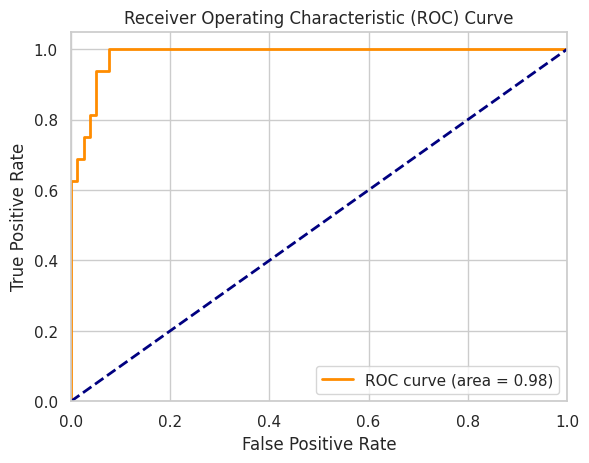

In [145]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

# Assuming df is already populated with your data
# Features and target variable
X = df[['lat', 'long', 'phsyn', 'ts', 'gtop', 'pre']]
y = df['classes']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predict on test data
y_pred = ada_model.predict(X_test)
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

print(f'AdaBoost Classifier Accuracy: {accuracy:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
print('Classification Report:')
print(report)



AdaBoost Classifier Accuracy: 0.97
ROC AUC Score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.88      0.94      0.91        16

    accuracy                           0.97        94
   macro avg       0.93      0.96      0.94        94
weighted avg       0.97      0.97      0.97        94



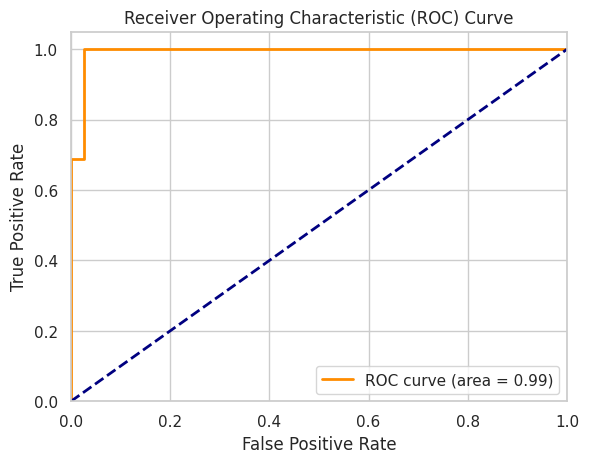

In [147]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()